In [1]:
%pylab inline

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py 
import cv2
from tqdm import tqdm
import numpy as np

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import tensorflow.keras.utils as utils

In [4]:
with h5py.File('Galaxy10_DECals.h5', 'r') as File:
    images = np.array(File['images'])
    labels = np.array(File['ans'])

labels = labels.astype(np.float32)
images = images.astype(np.float32)

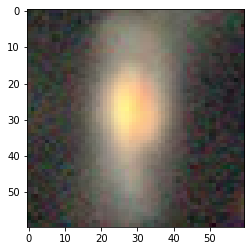

In [5]:
test_roi = images[0][100:160, 100:160]
imshow(test_roi.astype(np.uint8))

In [6]:
images_res = np.empty((images.shape[0], 60, 60, 3), dtype=images.dtype)
images = images.astype(np.uint8)
for i in range(images.shape[0]):
    images_res[i] = images[i][100:160, 100:160]

In [7]:
labels_f = utils.to_categorical(labels, 10)

In [8]:
split_idx = int(images.shape[0] * 0.8)

images = images_res[:split_idx, :]
images_test = images_res[split_idx:, :]

labels = labels_f[:split_idx, :]
labels_test = labels_f[split_idx:, :]

In [9]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(9, 9), activation='relu', input_shape=(60, 60, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid', input_shape=(12, 921600)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 52, 52, 128)       31232     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

2021-08-17 23:41:57.034852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-17 23:41:57.051397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-17 23:41:57.051847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-17 23:41:57.052435: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

In [10]:
model.compile(loss=tensorflow.keras.losses.mean_squared_error, optimizer = tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

In [11]:
classifier = model.fit(
        images[:8000],
        labels[:8000],
        batch_size=12,
        epochs=250,
)

2021-08-17 23:41:57.665380: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250


2021-08-17 23:41:58.182286: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8202


667/667 [==============================] - 6s 6ms/step - loss: 0.0758 - accuracy: 0.3243
Epoch 2/250
667/667 [==============================] - 4s 6ms/step - loss: 0.0755 - accuracy: 0.3294
Epoch 3/250
667/667 [==============================] - 4s 6ms/step - loss: 0.0755 - accuracy: 0.3257
Epoch 4/250
667/667 [==============================] - 4s 6ms/step - loss: 0.0755 - accuracy: 0.3243
Epoch 5/250
667/667 [==============================] - 4s 6ms/step - loss: 0.0755 - accuracy: 0.3260
Epoch 6/250
667/667 [==============================] - 4s 6ms/step - loss: 0.0755 - accuracy: 0.3265
Epoch 7/250
667/667 [==============================] - 4s 6ms/step - loss: 0.0755 - accuracy: 0.3294
Epoch 8/250
667/667 [==============================] - 4s 6ms/step - loss: 0.0756 - accuracy: 0.3260
Epoch 9/250
667/667 [==============================] - 4s 6ms/step - loss: 0.0755 - accuracy: 0.3239
Epoch 10/250
667/667 [==============================] - 4s 6ms/step - loss: 0.0755 - accuracy: 0.3282
E

667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3248
Epoch 82/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3302
Epoch 83/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0756 - accuracy: 0.3266
Epoch 84/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3306
Epoch 85/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0754 - accuracy: 0.3280
Epoch 86/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3280
Epoch 87/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0756 - accuracy: 0.3296
Epoch 88/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3295
Epoch 89/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3280
Epoch 90/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 

667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3268
Epoch 161/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3269
Epoch 162/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3306
Epoch 163/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3248
Epoch 164/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3194
Epoch 165/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3307
Epoch 166/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3295
Epoch 167/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3265
Epoch 168/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3261
Epoch 169/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0754 - a

667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3254
Epoch 240/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3237
Epoch 241/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3221
Epoch 242/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3254
Epoch 243/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3231
Epoch 244/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3264
Epoch 245/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3291
Epoch 246/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3239
Epoch 247/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - accuracy: 0.3228
Epoch 248/250
667/667 [==============================] - 5s 7ms/step - loss: 0.0755 - a

In [13]:
total = 0
correct = 0
print(images_test.shape)

def index(arr, val):
    for i in range(len(arr) - 1):
        if arr[i] == val:
            return i
    return -1

test_data = range(images_test.shape[0] - 1)
for i in tqdm(test_data):
    X_test = images_test[i]
    Y_test = labels_test[i]

    X = model.predict(np.array([X_test]))
    prediction = tensorflow.keras.backend.argmax(X)

    real = Y_test

    if index(prediction, 1) == index(real, 1):
        correct += 1

    total += 1

print('total', total)
print('correct', correct)
print('accuracy', round(correct / total, 3))

(3548, 60, 60, 3)


100%|█████████████████████████████████████| 3547/3547 [01:15<00:00, 46.84it/s]

total 3547
correct 1872
accuracy 0.528
